In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import math
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler


import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

In [10]:
df = pd.read_csv('Data/AMZN.csv', index_col='Date')
temp_df = df.reset_index()['Close']

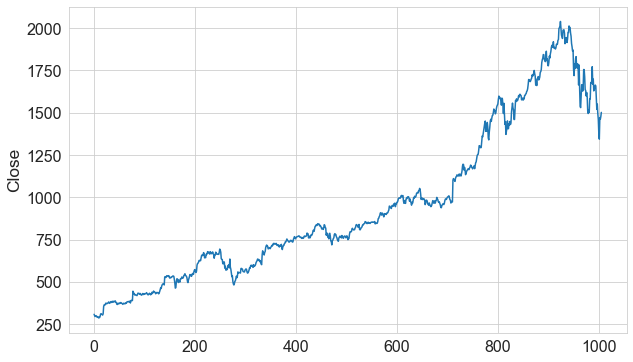

In [11]:
plt.ylabel('Close')
plt.plot(temp_df)

In [12]:
scaler = MinMaxScaler(feature_range=(0,1))
temp_df = scaler.fit_transform(np.array(temp_df).reshape(-1,1))
train_df, test_df = temp_df[0:755,:], temp_df[755:,:]

In [13]:
def create_truncation(df, window_size = 60):
    x, y = [], []
    for i in range(len(df) - window_size - 1):
        feat = df[i:(i+window_size)]
        x.append(feat)
        y.append(df[i+window_size])
    return np.array(x), np.array(y)

In [14]:
x_train, y_train = create_truncation(train_df, 60)
x_test, y_test = create_truncation(test_df, 60)

In [15]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (60, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, activation = 'tanh'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [17]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size = 64, verbose = 1)

Epoch 1/200
11/11 [==============================] - 2s 137ms/step - loss: 0.0284 - val_loss: 0.0359
Epoch 2/200
11/11 [==============================] - 1s 74ms/step - loss: 0.0050 - val_loss: 0.0203
Epoch 3/200
11/11 [==============================] - 1s 59ms/step - loss: 0.0030 - val_loss: 0.0359
Epoch 4/200
11/11 [==============================] - 1s 55ms/step - loss: 0.0019 - val_loss: 0.0046
Epoch 5/200
11/11 [==============================] - 1s 55ms/step - loss: 0.0015 - val_loss: 0.0056
Epoch 6/200
11/11 [==============================] - 1s 55ms/step - loss: 0.0014 - val_loss: 0.0037
Epoch 7/200
11/11 [==============================] - 1s 53ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 8/200
11/11 [==============================] - 1s 54ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 9/200
11/11 [==============================] - 1s 53ms/step - loss: 0.0012 - val_loss: 0.0028
Epoch 10/200
11/11 [==============================] - 1s 50ms/step - loss: 0.0011 - val_loss: 0.002

11/11 [==============================] - 1s 52ms/step - loss: 3.6764e-04 - val_loss: 0.0017
Epoch 157/200
11/11 [==============================] - 1s 54ms/step - loss: 4.2786e-04 - val_loss: 0.0017
Epoch 158/200
11/11 [==============================] - 1s 50ms/step - loss: 4.0018e-04 - val_loss: 0.0017
Epoch 159/200
11/11 [==============================] - 1s 51ms/step - loss: 4.0106e-04 - val_loss: 0.0017
Epoch 160/200
11/11 [==============================] - 1s 50ms/step - loss: 4.1725e-04 - val_loss: 0.0017
Epoch 161/200
11/11 [==============================] - 1s 50ms/step - loss: 3.8921e-04 - val_loss: 0.0017
Epoch 162/200
11/11 [==============================] - 1s 50ms/step - loss: 3.7732e-04 - val_loss: 0.0020
Epoch 163/200
11/11 [==============================] - 1s 49ms/step - loss: 3.7337e-04 - val_loss: 0.0019
Epoch 164/200
11/11 [==============================] - 1s 49ms/step - loss: 4.1453e-04 - val_loss: 0.0019
Epoch 165/200
11/11 [==============================] - 1s 49

In [18]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [19]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [20]:
print ("Training RMSE is {}".format(math.sqrt(MSE(scaler.inverse_transform(y_train), train_predict))))
print ("Training RMSE is {}".format(math.sqrt(MSE(scaler.inverse_transform(y_test), test_predict))))

Training RMSE is 23.403468081565553
Training RMSE is 73.56177699873989


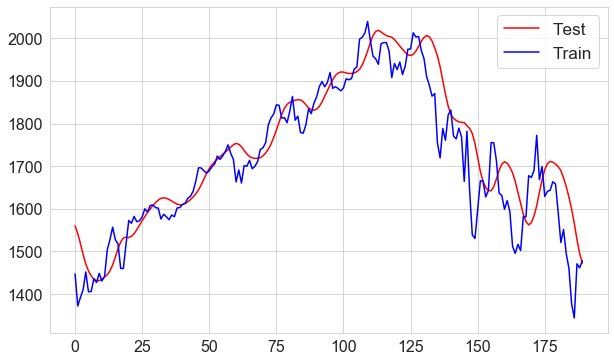

In [21]:
fig = plt.figure(figsize=(10, 6))
plt.plot(test_predict, color='red', label='Test')
plt.plot(scaler.inverse_transform(y_test), color='blue', label='Train')
plt.legend(loc='best')